## <font color=k>The Linear Perceptron Algorithm </font>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [32]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=40, centers=2, n_features=2, cluster_std=3.5, random_state=32)

In [33]:
# creating customized Colormaps
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['indianred', 'darkcyan'])
cmap2 = ListedColormap(['tab:red', 'tab:blue'])

In [34]:
def scatter_blobs(X, y, cmap=cmap2, ax=None, title=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, s=60)
    ax.set_xlim(np.round(X[:,0].min() - 1 ), np.round(X[:,0].max() + 1))
    ax.set_ylim(np.round(X[:,1].min() - 1 ), np.round(X[:,1].max() + 1))
    ax.set(title="Toy 2D Dataset", xlabel="Feature 0", ylabel="Feature1")
    if title != None:
        ax.set_title(title)

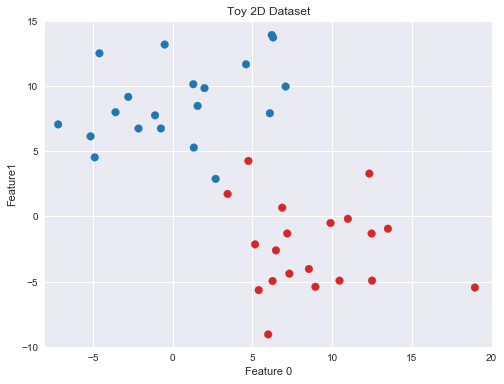

In [35]:
scatter_blobs(X,y)

In [36]:
def decision_boundary(X, weights, bias, ax=None, ls='-', c='k', alpha=0.65):
    if ax == None:
        fig, ax = plt.subplots(figsize=(8,6))
    x = np.arange(X[:,0].min()-1, X[:,0].max()+1, 0.01)
    y = -((weights[0]/weights[1])*x + (bias/weights[1]))
    ax.plot(x, y, linestyle=ls, color=c, alpha=alpha, linewidth=1.5)

## <font color=k> The Algorithm </font>

In [38]:
def perceptron(X, y, alpha=0.01, num_epochs=100):
    rng = np.random.RandomState(32)
    bias = 0.01 
    weights = rng.rand(X.shape[1], 1) # randomly initialize weights
    initial = (weights, bias)
    all_coefs = {} # holds model coefs for each epoch
    for epoch in range(num_epochs):
        weights_ = []
        bias_ = []
        for i in range(X.shape[0]):
            activation = X[i,:].dot(weights) + bias
            if activation >= 0:
                pred = 1
            else:
                pred = 0
            error = (y[i]-pred)
            # update weights using SGD (only updates after incorrect pred)
            bias = bias + alpha*error
            weights = weights + alpha*error*X[i,:].reshape(-1,1)
            if error != 0: # only keep track of updated coefs
                weights_.append(weights)
                bias_.append(bias)
                all_coefs[epoch] = (weights_, bias_)
    return initial, all_coefs

In [39]:
initial, all_coefs = perceptron(X, y, num_epochs=20)
final = all_coefs[list(all_coefs.keys())[-1]]

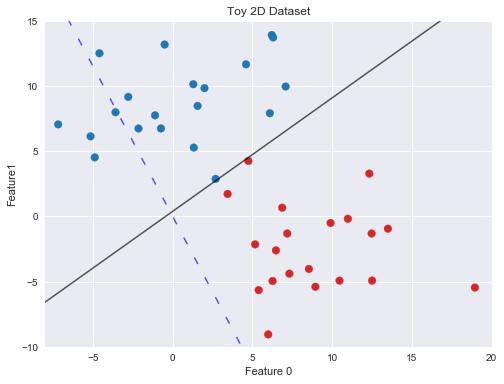

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
scatter_blobs(X, y, ax=ax)
decision_boundary(X, initial[0], initial[1], ax=ax, ls=(0, (5, 10)), c='b')
decision_boundary(X, final[0][0], final[1][0], ax=ax, ls='-', c='k')

In [41]:
h = 0.01 # step size in the mesh
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
x_array = np.arange(xmin, xmax, h)
y_array = np.arange(ymin, ymax, h)
xx, yy = np.meshgrid(x_array, y_array)
zz = np.c_[xx.ravel(), yy.ravel()]

In [42]:
def predict(zz, weights, bias):
    predictions = []
    for j in range(zz.shape[0]):
        activation = zz[j,:].dot(weights) + bias
        if activation >= 0:
            pred = 1
        else:
            pred = 0
        predictions.append(pred)
    return np.array(predictions)

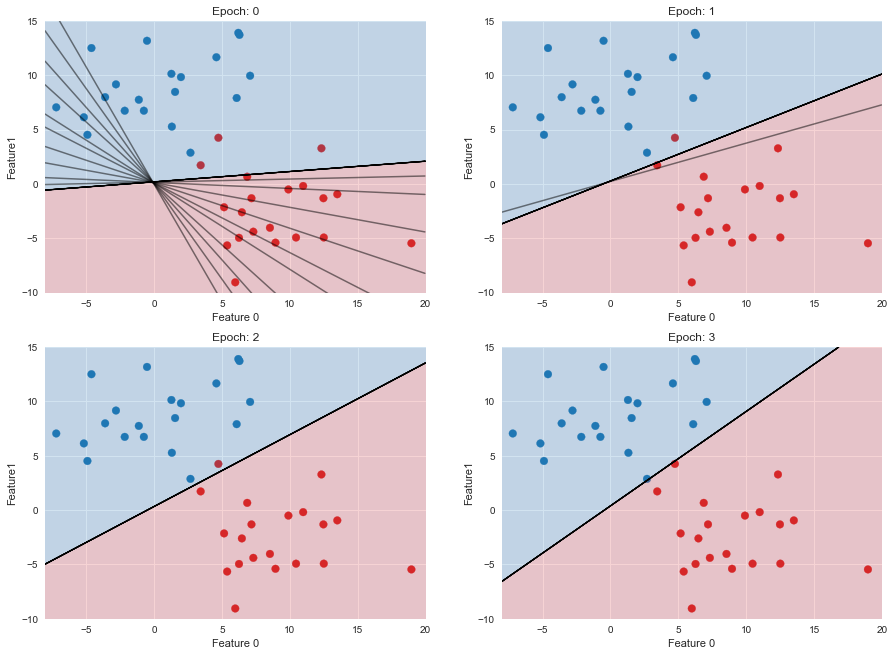

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

for i, ax in enumerate(axes.flat):
    scatter_blobs(X, y, ax=ax)
    ax.set_title("Epoch: {}".format(i))
    for j, (w, b) in enumerate(zip(all_coefs[i][0], all_coefs[i][1])):
        decision_boundary(X, w, b, ax=ax, alpha=0.5)
    pred = predict(zz, w, b)
    Z = pred.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap2, alpha=0.2)
    ax.contour(xx, yy, Z, colors='k', linewidths=1)